In [1]:
# pip install ipython
# pip install pillow
# pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from PIL import Image as Image2

import tushare as ts
import datetime
from datetime import datetime as dtime
import mpl_finance as mpf
import seaborn as sns
from matplotlib.pylab import date2num
import talib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

D:\anacon\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


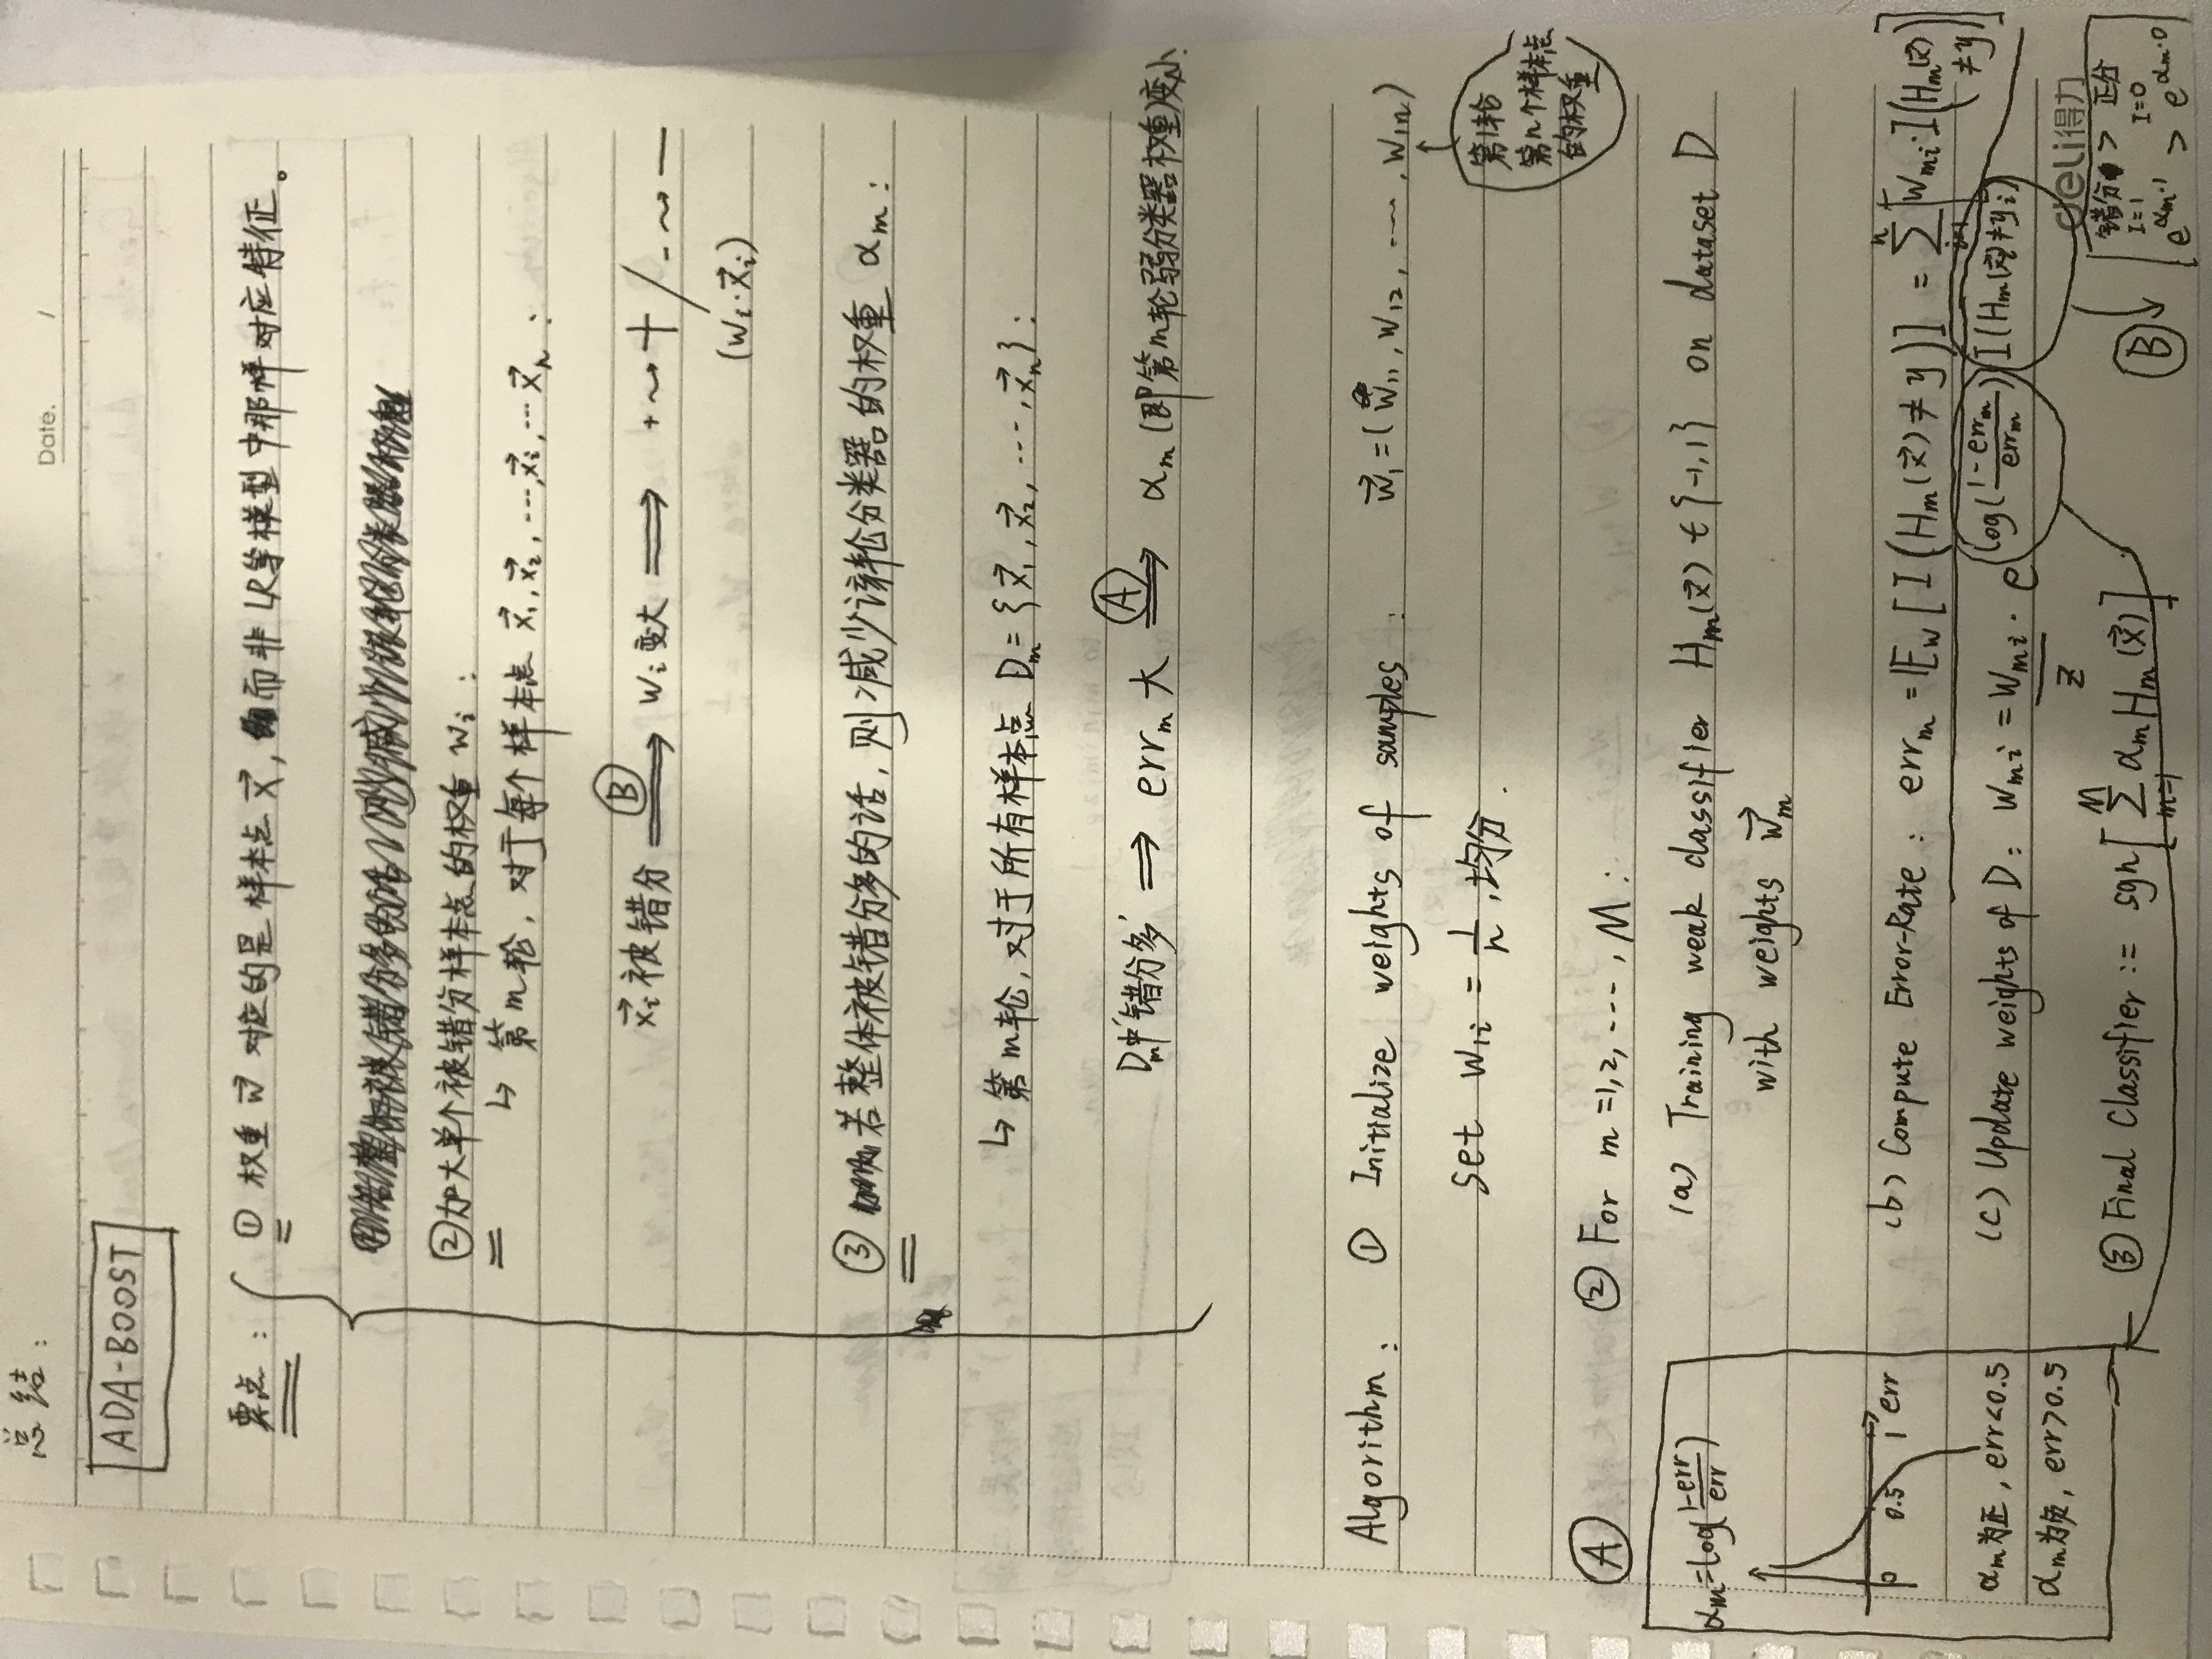

In [2]:
'''
What is bagging in two graphs?
'''

Image(filename = "adaboost.jpg", width = 700, height = 700)

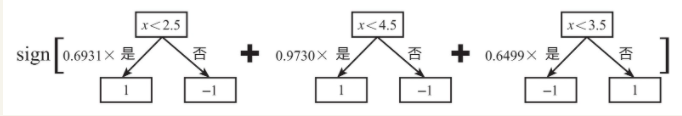

In [3]:
Image(filename = "adaboost2.png", width = 700, height = 700)

In [4]:
'''
简单实现AdaBoost Classifier
'''

X_class = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y_class = [0, 0, 0, 1, 1]

model_class = AdaBoostClassifier(random_state=123)
model_class.fit(X_class, y_class)

print(model_class.predict([[5, 5]]))

[0]


In [5]:
'''
简单实现AdaBoost Regressor
'''

X_reg = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y_reg = [1, 2, 3, 4, 5]

model_reg = AdaBoostRegressor(random_state=123)
model_reg.fit(X_reg, y_reg)

print(model_reg.predict([[5, 5]]))

[3.]


In [6]:
credit_df = pd.read_excel('信用卡精准营销模型.xlsx')
credit_df.head()

年龄  月收入（元）  月消费（元）  性别   月消费/月收入  响应
0  30    7275    6062   0  0.833265   1
1  25   17739   13648   0  0.769378   1
2  29   25736   14311   0  0.556069   1
3  23   14162    7596   0  0.536365   1
4  27   15563   12849   0  0.825612   1

In [7]:
# split features and label
X = credit_df.drop(columns='响应') 
y = credit_df['响应']

X_train, X_test, y_train, y_test\
= train_test_split(X, y, test_size=0.2, random_state=123)

ada_clf = AdaBoostClassifier(random_state=123)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

预测值  实际值
0    1    1
1    1    1
2    1    1
3    0    0
4    1    1

In [8]:
ada_score = accuracy_score(y_pred, y_test)
print(ada_score)

0.85


In [9]:
y_pred_proba = ada_clf.predict_proba(X_test)
y_pred_proba[0:5]

array([[0.19294615, 0.80705385],
       [0.41359387, 0.58640613],
       [0.42597039, 0.57402961],
       [0.66817389, 0.33182611],
       [0.32850159, 0.67149841]])

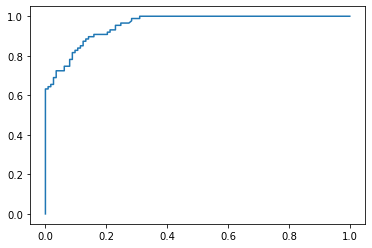

In [10]:
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.show()

In [11]:
ori_auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
print(ori_auc_score)

0.9559047909673483


In [13]:
features = X.columns  # 获取特征名称
importances = ada_clf.feature_importances_  # 获取特征重要性
# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['feature'] = features
importances_df['feature_importance'] = importances
importances_df.sort_values('feature_importance', ascending=False)

feature  feature_importance
2   月消费（元）                0.36
4  月消费/月收入                0.24
1   月收入（元）                0.20
0       年龄                0.18
3       性别                0.02

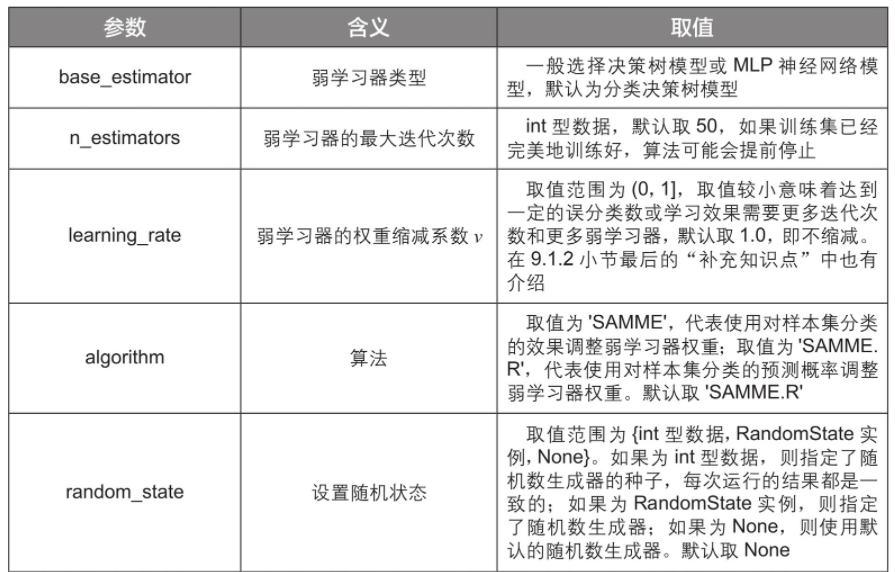

In [14]:
'''
hyperparameters of adaboost classification
'''

Image(filename = "boostclass.png", width = 700, height = 700)

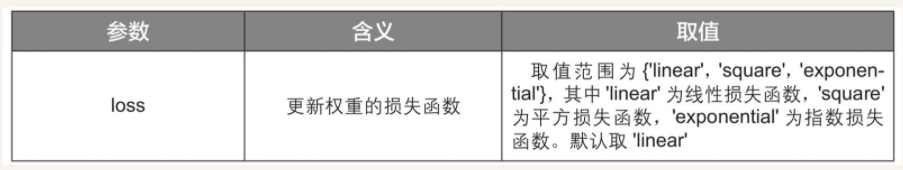

In [15]:
'''
hyperparameters of adaboost regression
'''

Image(filename = "boostreg.png", width = 700, height = 700)